In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import math
matplotlib.style.use('ggplot')

In [3]:
df=pd.read_csv('indicators_by_company.csv')

In [4]:
df.head()

,company_id,indicator_id,2010,2011,2012,2013,2014,2015,2016
0,1000045,AccountsPayableAndAccruedLiabilitiesCurrentAnd...,NaN,6612429.0,7405579.0,8924919.0,7841070.0,5839000.0,NaN
1,1000045,AccumulatedDepreciationDepletionAndAmortizatio...,NaN,NaN,2111343.0,2242703.0,2236449.0,2462000.0,NaN
2,1000045,AdjustmentForAmortization,NaN,NaN,-11482251.0,-13490892.0,-13852305.0,-13811000.0,NaN
3,1000045,Assets,NaN,257236034.0,263835468.0,283429579.0,302528591.0,325309000.0,NaN
4,1000045,AssetsHeldForSaleAtCarryingValue,NaN,1373001.0,1203664.0,1696330.0,NaN,NaN,NaN


In [15]:
# Number of indicators by company
by_year = []
for year in df.columns[2:]:
    by_year.append(df[['company_id', 'indicator_id', year]].dropna().groupby('company_id').count()['indicator_id'])
df_ind_count = pd.concat(by_year, axis=1)
df_ind_count.columns = df.columns[2:]
df_ind_count.head()

,2010,2011,2012,2013,2014,2015,2016
company_id,,,,,,,
1750,100.0,179.0,184.0,175.0,192.0,173.0,NaN
1800,NaN,180.0,167.0,188.0,193.0,196.0,NaN
1961,NaN,NaN,55.0,80.0,56.0,64.0,NaN
2034,NaN,222.0,214.0,205.0,192.0,197.0,NaN
2098,NaN,81.0,214.0,204.0,204.0,211.0,NaN


In [18]:
df_ind_count_desc=df_ind_count.describe().T
df_ind_count_desc

,count,mean,std,min,25%,50%,75%,max
2010,247.0,134.910931,79.273019,14.0,80.0,98.0,213.50,342.0
2011,7102.0,111.869755,75.335138,1.0,62.0,86.0,139.75,499.0
2012,7085.0,159.747071,81.386167,1.0,92.0,163.0,220.00,505.0
2013,6997.0,161.654566,80.942788,1.0,95.0,165.0,221.00,496.0
2014,6876.0,165.746219,80.741599,1.0,102.0,169.0,224.00,491.0
2015,6135.0,171.007824,78.674520,3.0,113.0,175.0,225.00,489.0
2016,7.0,226.714286,41.185411,178.0,203.0,219.0,240.50,303.0


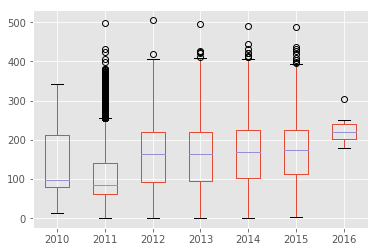

In [19]:
df_ind_count.plot(kind='box')

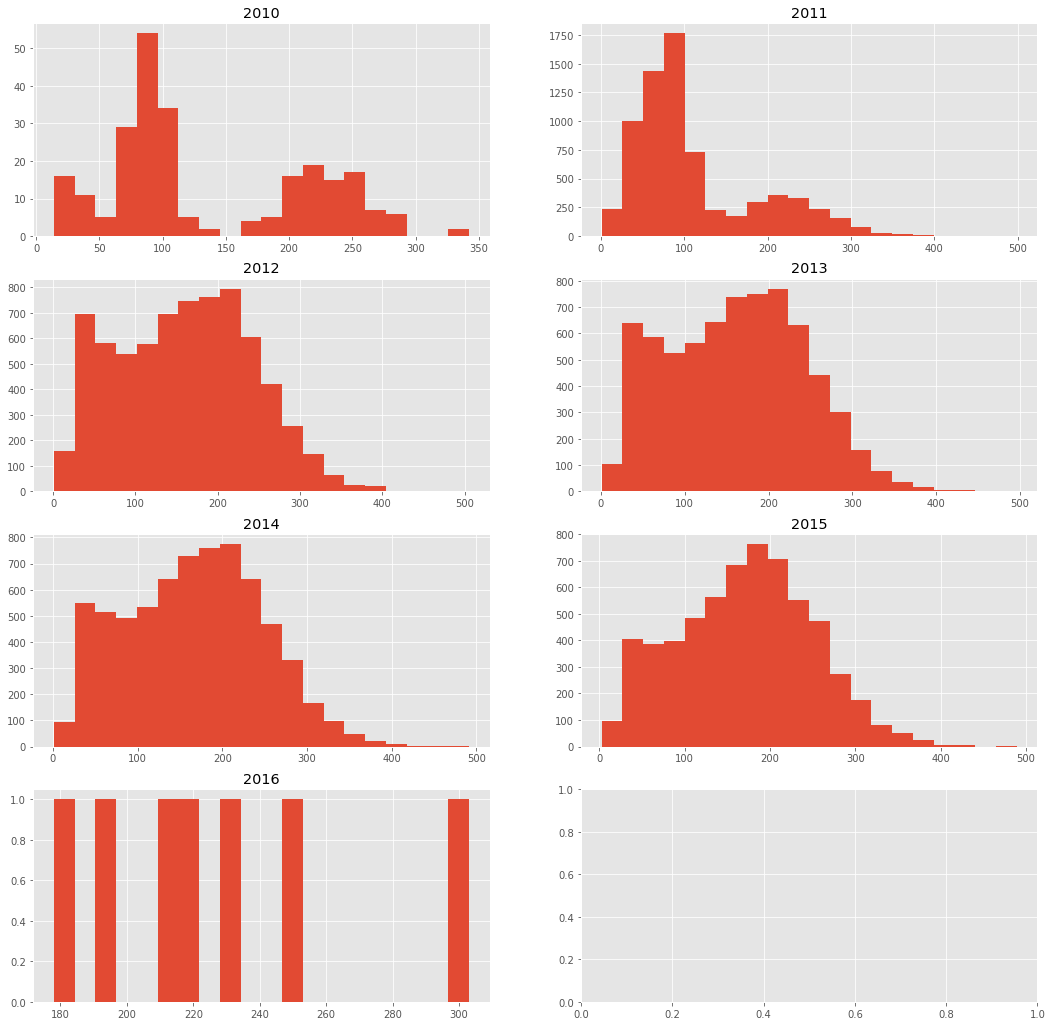

In [50]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 18))
for index, year in enumerate(df.columns[2:]):
    df_ind_count[year].hist(ax=axes[int(index/2), index%2], bins=20)
    axes[int(index/2), index%2].set_title(year)

In [54]:
# Number of indicators by company
by_year = []
for year in df.columns[2:]:
    by_year.append(df[['company_id', 'indicator_id', year]].dropna()\
                   .groupby('indicator_id').count()['company_id'].sort_values(ascending=False).head(200))
df_comp_count = pd.concat(by_year, axis=1)
df_comp_count.columns = df.columns[2:]
df_comp_count.head()

,2010,2011,2012,2013,2014,2015,2016
AccountsPayableAndAccruedLiabilitiesCurrent,NaN,1029.0,NaN,NaN,NaN,NaN,NaN
AccountsPayableCurrent,194.0,3882.0,3959.0,3944.0,3907.0,3541.0,7.0
AccountsReceivableNetCurrent,138.0,3351.0,3394.0,3369.0,3368.0,3046.0,7.0
AccruedIncomeTaxesCurrent,82.0,1055.0,NaN,NaN,NaN,NaN,NaN
AccruedLiabilitiesCurrent,112.0,2523.0,2654.0,2655.0,2708.0,2361.0,5.0


In [55]:
df_comp_count.dropna().describe().T

,count,mean,std,min,25%,50%,75%,max
2010,116.0,125.163793,57.536218,49.0,74.75,104.5,174.25,243.0
2011,116.0,2676.094828,1698.659620,879.0,1364.50,2022.0,3684.75,6886.0
2012,116.0,3354.094828,1383.438646,1470.0,2243.25,3103.5,4040.50,6888.0
2013,116.0,3338.862069,1340.439836,1490.0,2184.75,3102.5,4084.00,6816.0
2014,116.0,3325.120690,1294.086357,1531.0,2165.00,3101.5,4049.75,6709.0
2015,116.0,3045.525862,1146.420785,1428.0,2106.50,2885.0,3747.25,6012.0
2016,116.0,5.620690,1.329630,3.0,5.00,6.0,7.00,7.0
